In [118]:
%matplotlib inline

In [119]:
from os import listdir
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy import stats
from sklearn.decomposition import PCA

In [104]:
# Enable interactive matplotlib plots
%matplotlib notebook

In [105]:
# Print versions
!python --version
print('Numpy ' + np.__version__)
print('Pandas ' + pd.__version__)

Python 3.7.11
Numpy 1.20.3
Pandas 1.3.2


In [106]:
# Settings
dataset_path = 'dataCollect'  # Directory where raw accelerometer data is stored
normal_op_list = ['male_h179_w67_24_normal','male_h176_w67_24_normal']
apnea_op_list = ['male_h179_w67_24_apnea', 'male_h176_w67_24_apnea']
sample_rate = 200       # Hz
sample_time = 0.5       # Time (sec) length of each sample
samples_per_file = 200 # Expected number of measurements in each file
max_measurements = int(sample_time * sample_rate)

print('Max measurements per file:', max_measurements)

Max measurements per file: 100


In [107]:
# Create list of filenames
def createFilenameList(op_list):
    
    # Extract paths and filenames in each directory
    op_filenames = []
    num_samples = 0
    for index, target in enumerate(op_list):
        samples_in_dir = listdir(join(dataset_path, target))
        samples_in_dir = [join(dataset_path, target, sample) for sample in samples_in_dir]
        op_filenames.append(samples_in_dir)
    
    # Flatten list
    return [item for sublist in op_filenames for item in sublist]

In [108]:
# Create normal and apnea filename lists
normal_op_filenames = createFilenameList(normal_op_list)
apnea_op_filenames = createFilenameList(apnea_op_list)
print('Number of normal samples:', len(normal_op_filenames))
print('Number of apnea samples:', len(apnea_op_filenames))

Number of normal samples: 42
Number of apnea samples: 42


In [109]:
# Function to plot normal vs apnea samples side-by-side
def plotTimeSeriesSample(normal_sample, apnea_sample):
    fig, axs = plt.subplots(2, 1, figsize=(6, 6))
    fig.tight_layout(pad=3.0)
    axs[0].plot(normal_sample.T[0], label='x')
    axs[0].plot(normal_sample.T[1], label='y')
    axs[0].plot(normal_sample.T[2], label='z')
    axs[0].set_title('Normal sample')
    axs[0].set_xlabel('sample')
    axs[0].set_ylabel('G-force')
    axs[0].legend()
    axs[1].plot(apnea_sample.T[0], label='x')
    axs[1].plot(apnea_sample.T[1], label='y')
    axs[1].plot(apnea_sample.T[2], label='z')
    axs[1].set_title('apnea sample')
    axs[1].set_xlabel('sample')
    axs[1].set_ylabel('G-force')
    axs[1].legend()

In [110]:
# Function to plot 3D scatterplot of normal and apnea smaples
def plotScatterSamples(normal_samples, apnea_samples, num_samples, title=''):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for i in range(num_samples):
        ax.scatter(normal_samples[i].T[0], normal_samples[i].T[1], normal_samples[i].T[2], c='b')
        ax.scatter(apnea_samples[i].T[0], apnea_samples[i].T[1], apnea_samples[i].T[2], c='r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(title)

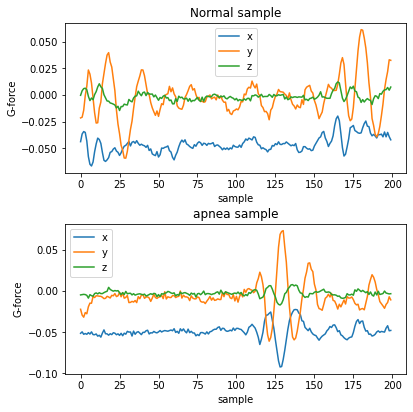

In [135]:
# Examine a normal sample vs anomalous sample
normal_sample = np.genfromtxt(normal_op_filenames[0], delimiter=',')
apnea_sample = np.genfromtxt(apnea_op_filenames[0], delimiter=',')

# Plot time series of accelerometer data
plotTimeSeriesSample(normal_sample, apnea_sample)
plt.show()

In [136]:
# Shuffle samples for further analysis
random.shuffle(normal_op_filenames)
random.shuffle(apnea_op_filenames)

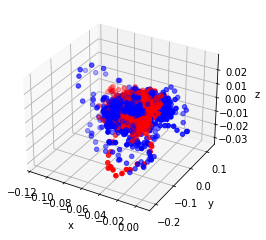

In [137]:
# Make a 3D scatterplot
num_samples = 20
normal_samples = []
apnea_samples = []
for i in range(num_samples):
    normal_samples.append(np.genfromtxt(normal_op_filenames[i], delimiter=','))
    apnea_samples.append(np.genfromtxt(apnea_op_filenames[i], delimiter=','))

plotScatterSamples(normal_samples, apnea_samples, num_samples)

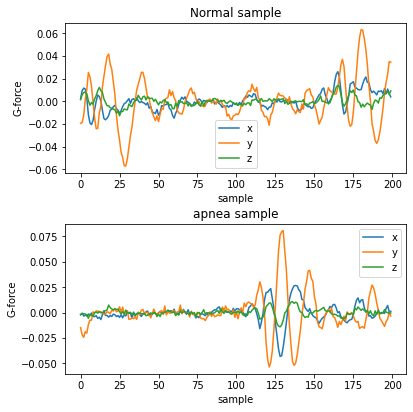

In [121]:
# Let's remove DC to see what it looks like in time domain
normal_sample = np.genfromtxt(normal_op_filenames[0], delimiter=',')
apnea_sample = np.genfromtxt(apnea_op_filenames[0], delimiter=',')
normal_sample = normal_sample - np.mean(normal_sample, axis=0)
apnea_sample = apnea_sample - np.mean(apnea_sample, axis=0)

# Plot time series of accelerometer data
plotTimeSeriesSample(normal_sample, apnea_sample)

(200, 3)


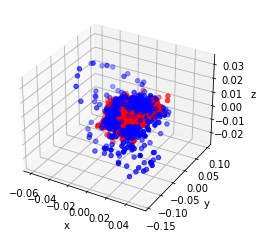

In [120]:
# Make a 3D scatterplot with DC removed
num_samples = 10
normal_samples = []
apnea_samples = []
for i in range(num_samples):
    normal_sample = np.genfromtxt(normal_op_filenames[i], delimiter=',')
    apnea_sample = np.genfromtxt(apnea_op_filenames[i], delimiter=',')
    normal_sample = normal_sample - np.mean(normal_sample, axis=0)
    apnea_sample = apnea_sample - np.mean(apnea_sample, axis=0)
    normal_samples.append(normal_sample)
    apnea_samples.append(apnea_sample)

print(apnea_samples[0].shape)
plotScatterSamples(normal_samples, apnea_samples, num_samples)

In [131]:
# Let's look at various statistics of 1 sample (with DC removed)
idx = 0
normal_sample = np.genfromtxt(normal_op_filenames[idx], delimiter=',')
normal_sample = normal_sample - np.mean(normal_sample, axis=0)

print('Sample shape:', normal_sample.shape)
print('Mean:', np.mean(normal_sample, axis=0))
print('Variance:', np.var(normal_sample, axis=0))
print('Kurtosis:', stats.kurtosis(normal_sample))
print('Skew:', stats.skew(normal_sample))
print('MAD:', stats.median_absolute_deviation(normal_sample))
print('Correlation:')
print(np.corrcoef(normal_sample.T))

Sample shape: (200, 3)
Mean: [-5.37764278e-18  1.31838984e-18  8.41340886e-19]
Variance: [6.16090432e-05 3.81037852e-04 1.84520363e-05]
Kurtosis: [0.89955185 1.53067171 1.14827765]
Skew: [0.5281962  0.2817081  0.51864175]
MAD: [0.00572877 0.0151114  0.00306157]
Correlation:
[[1.         0.1167012  0.46866552]
 [0.1167012  1.         0.11354376]
 [0.46866552 0.11354376 1.        ]]


C:\Users\beamtana\anaconda3\envs\python3.7\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  # This is added back by InteractiveShellApp.init_path()


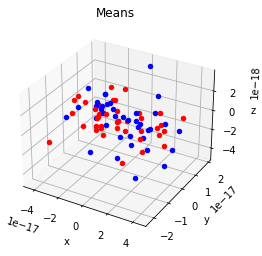

In [146]:
# Make a 3D scatterplot of means (with DC removed)
num_samples = 40
normal_samples = []
apnea_samples = []

for i in range(num_samples):
    normal_sample = np.genfromtxt(normal_op_filenames[i], delimiter=',')
    apnea_sample = np.genfromtxt(apnea_op_filenames[i], delimiter=',')
    normal_sample = normal_sample - np.mean(normal_sample, axis=0)
    apnea_sample = apnea_sample - np.mean(apnea_sample, axis=0)
    normal_samples.append(np.mean(normal_sample, axis=0))
    apnea_samples.append(np.mean(apnea_sample, axis=0))
plotScatterSamples(normal_samples, apnea_samples, num_samples, title='Means')

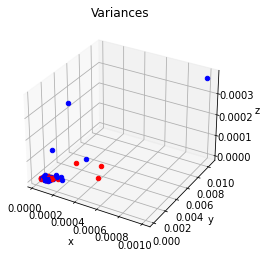

In [147]:
# Make a 3D scatterplot of variances
num_samples = 40
normal_samples = []
apnea_samples = []
for i in range(num_samples):
    normal_sample = np.genfromtxt(normal_op_filenames[i], delimiter=',')
    apnea_sample = np.genfromtxt(apnea_op_filenames[i], delimiter=',')
    normal_samples.append(np.var(normal_sample, axis=0))
    apnea_samples.append(np.var(apnea_sample, axis=0))
plotScatterSamples(normal_samples, apnea_samples, num_samples, title='Variances')

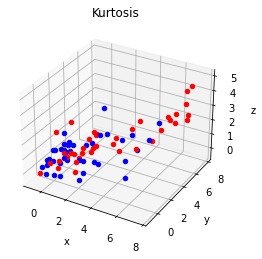

In [148]:
# Make a 3D scatterplot of kurtosis
num_samples = 40
normal_samples = []
apnea_samples = []
for i in range(num_samples):
    normal_sample = np.genfromtxt(normal_op_filenames[i], delimiter=',')
    apnea_sample = np.genfromtxt(apnea_op_filenames[i], delimiter=',')
    normal_samples.append(stats.kurtosis(normal_sample))
    apnea_samples.append(stats.kurtosis(apnea_sample))
plotScatterSamples(normal_samples, apnea_samples, num_samples, title='Kurtosis')

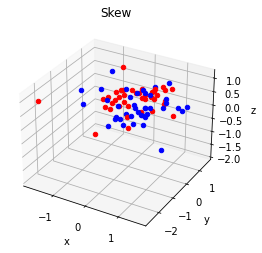

In [149]:
# Make a 3D scatterplot of skew
num_samples = 40
normal_samples = []
apnea_samples = []
for i in range(num_samples):
    normal_sample = np.genfromtxt(normal_op_filenames[i], delimiter=',')
    apnea_sample = np.genfromtxt(apnea_op_filenames[i], delimiter=',')
    normal_samples.append(stats.skew(normal_sample))
    apnea_samples.append(stats.skew(apnea_sample))
plotScatterSamples(normal_samples, apnea_samples, num_samples, title='Skew')

C:\Users\beamtana\anaconda3\envs\python3.7\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  
C:\Users\beamtana\anaconda3\envs\python3.7\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  if __name__ == '__main__':


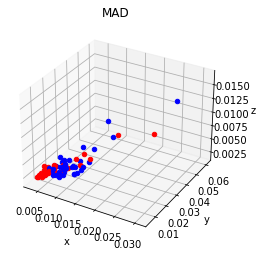

In [150]:
# Make a 3D scatterplot of MAD
num_samples = 40
normal_samples = []
apnea_samples = []
for i in range(num_samples):
    normal_sample = np.genfromtxt(normal_op_filenames[i], delimiter=',')
    apnea_sample = np.genfromtxt(apnea_op_filenames[i], delimiter=',')
    normal_samples.append(stats.median_absolute_deviation(normal_sample))
    apnea_samples.append(stats.median_absolute_deviation(apnea_sample))
plotScatterSamples(normal_samples, apnea_samples, num_samples, title='MAD')

Correlation coefficients of normal sample:
[[1.         0.55814286 0.54583963]
 [0.55814286 1.         0.30559748]
 [0.54583963 0.30559748 1.        ]]


Text(0.5, 0.98, 'Histograms of Correlation Coefficients')

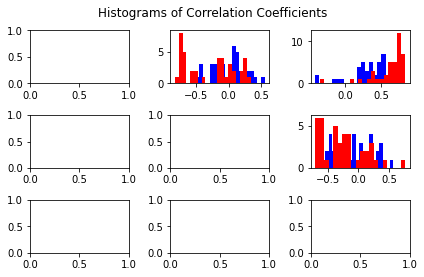

In [155]:
# Plot histograms of correlation matricies
num_samples = 40
n_bins = 20
normal_samples = []
apnea_samples = []
for i in range(num_samples):
    normal_sample = np.genfromtxt(normal_op_filenames[i], delimiter=',')
    apnea_sample = np.genfromtxt(apnea_op_filenames[i], delimiter=',')
    normal_sample = normal_sample - np.mean(normal_sample, axis=0)
    apnea_sample = apnea_sample - np.mean(apnea_sample, axis=0)
    normal_samples.append(np.corrcoef(normal_sample.T))
    apnea_samples.append(np.corrcoef(apnea_sample.T))
normal_samples = np.array(normal_samples)
apnea_samples = np.array(apnea_samples)
print('Correlation coefficients of normal sample:')
print(np.corrcoef(normal_sample.T))

# Draw plots
fig, axs = plt.subplots(3, 3)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
axs[0, 1].hist(normal_samples[:,0,1], bins=n_bins, color='blue')
axs[0, 1].hist(apnea_samples[:,0,1], bins=n_bins, color='red')
axs[0, 2].hist(normal_samples[:,0,2], bins=n_bins, color='blue')
axs[0, 2].hist(apnea_samples[:,0,2], bins=n_bins, color='red')
axs[1, 2].hist(normal_samples[:,1,2], bins=n_bins, color='blue')
axs[1, 2].hist(apnea_samples[:,1,2], bins=n_bins, color='red')
fig.suptitle('Histograms of Correlation Coefficients')

In [156]:
# Function: Calculate FFT for each axis in a given sample
def extract_fft_features(sample):

    # Truncate sample size
    #sample = sample[0:max_measurements]

    # Crate a window
    hann_window = np.hanning(sample.shape[0])

    # Compute a windowed FFT of each axis in the sample (leave off DC)
    out_sample = np.zeros((int(sample.shape[0] / 2), sample.shape[1]))
    for i, axis in enumerate(sample.T):
        fft = abs(np.fft.rfft(axis * hann_window))
        out_sample[:, i] = fft[1:]

    return out_sample

In [157]:
# Test: Compute FFTs (without DC) for samples and average them together
num_samples = 40
normal_ffts = []
apnea_ffts = []
for i in range(num_samples):
    normal_sample = np.genfromtxt(normal_op_filenames[i], delimiter=',')
    apnea_sample = np.genfromtxt(apnea_op_filenames[i], delimiter=',')
    normal_fft = extract_fft_features(normal_sample)
    apnea_fft = extract_fft_features(apnea_sample)
    normal_ffts.append(normal_fft)
    apnea_ffts.append(apnea_fft)
normal_ffts = np.array(normal_ffts)
apnea_ffts = np.array(apnea_ffts)
normal_fft_avg = np.average(normal_ffts, axis=0)
apnea_fft_avg = np.average(apnea_ffts, axis=0)

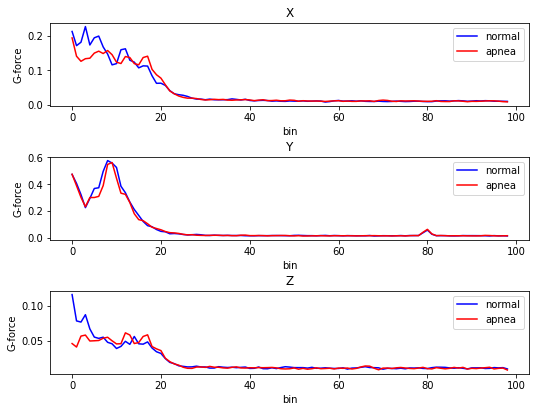

In [158]:
# Plot FFTs
start_bin = 1
fig, axs = plt.subplots(3, 1, figsize=(8, 6))
fig.tight_layout(pad=3.0)

axs[0].plot(normal_fft_avg[start_bin:, 0], label='normal', color='blue')
axs[0].plot(apnea_fft_avg[start_bin:, 0], label='apnea', color='red')
axs[0].set_title('X')
axs[0].set_xlabel('bin')
axs[0].set_ylabel('G-force')
axs[0].legend()

axs[1].plot(normal_fft_avg[start_bin:, 1], label='normal', color='blue')
axs[1].plot(apnea_fft_avg[start_bin:, 1], label='apnea', color='red')
axs[1].set_title('Y')
axs[1].set_xlabel('bin')
axs[1].set_ylabel('G-force')
axs[1].legend()

axs[2].plot(normal_fft_avg[start_bin:, 2], label='normal', color='blue')
axs[2].plot(apnea_fft_avg[start_bin:, 2], label='apnea', color='red')
axs[2].set_title('Z')
axs[2].set_xlabel('bin')
axs[2].set_ylabel('G-force')
axs[2].legend()